In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb

In [2]:
from google.colab import files
uploaded = files.upload()  # This opens a file upload dialog

Saving train.csv to train (1).csv


In [4]:
# Load training dataset
train_df = pd.read_csv("train.csv")

# Load testing dataset
test_df = pd.read_csv("test.csv")

# Display first few rows
print("Train Data:")
print(train_df.head())

print("\nTest Data:")
print(test_df.head())

Train Data:
   employee_id         department     region         education gender  \
0        65438  Sales & Marketing   region_7  Master's & above      f   
1        65141         Operations  region_22        Bachelor's      m   
2         7513  Sales & Marketing  region_19        Bachelor's      m   
3         2542  Sales & Marketing  region_23        Bachelor's      m   
4        48945         Technology  region_26        Bachelor's      m   

  recruitment_channel  no_of_trainings  age  previous_year_rating  \
0            sourcing                1   35                   5.0   
1               other                1   30                   5.0   
2            sourcing                1   34                   3.0   
3               other                2   39                   1.0   
4               other                1   45                   3.0   

   length_of_service  awards_won?  avg_training_score  is_promoted  
0                  8            0                  49            

In [5]:
print("Missing values in train dataset:")
print(train_df.isnull().sum())

print("\nMissing values in test dataset:")
print(test_df.isnull().sum())

Missing values in train dataset:
employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

Missing values in test dataset:
employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
awards_won?                0
avg_training_score         0
dtype: int64


In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_columns = ["department", "education", "gender", "recruitment_channel"]
label_encoders = {}
categorical_columns = train_df.select_dtypes(include=['object']).columns

for col in categorical_columns:
   le = LabelEncoder()
   train_df[col] = le.fit_transform(train_df[col])
   test_df[col] = le.transform(test_df[col])  # Apply same encoding to test data
   label_encoders[col] = le  # Save encoder for later use

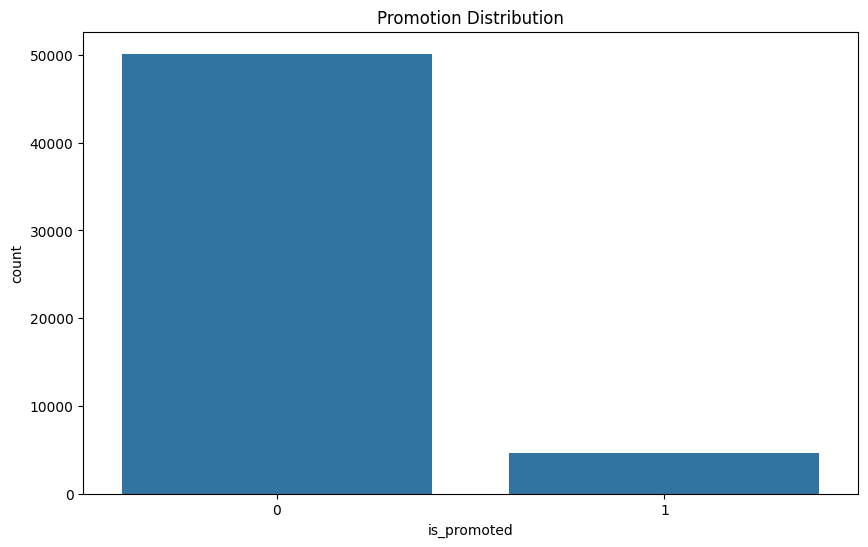

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x="is_promoted", data=train_df)
plt.title("Promotion Distribution")
plt.show()

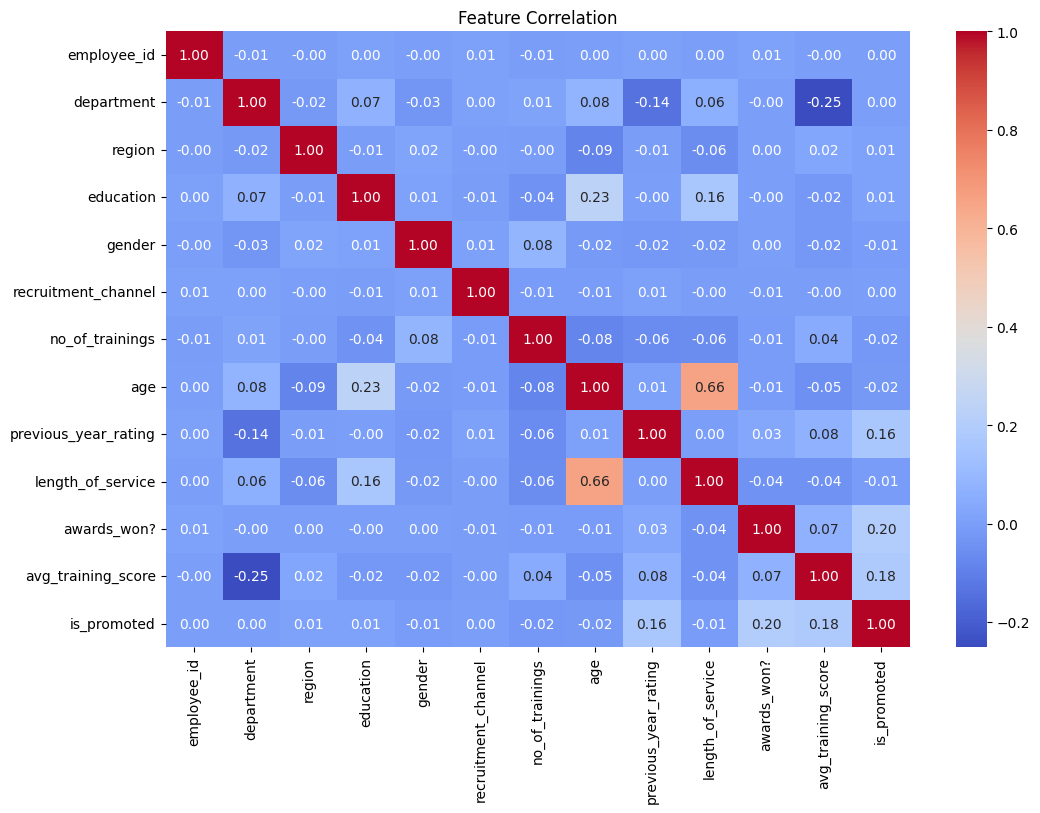

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation")
plt.show()

In [9]:
# Define features (X) and target variable (y)
X = train_df.drop(["employee_id", "is_promoted"], axis=1)
y = train_df["is_promoted"]

# Select features from test data (excluding 'employee_id')
X_test_final = test_df.drop(["employee_id"], axis=1)

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Remove NaN values from y and corresponding X rows
mask = ~pd.isna(y)
X, y = X[mask], y[mask]

# Perform train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_val)

# Model Evaluation
print("Random Forest Model Accuracy:", accuracy_score(y_val, y_pred_rf))
print(classification_report(y_val, y_pred_rf))

Random Forest Model Accuracy: 0.9345010034665208
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     10028
           1       0.84      0.29      0.43       934

    accuracy                           0.93     10962
   macro avg       0.89      0.64      0.70     10962
weighted avg       0.93      0.93      0.92     10962



In [13]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_val)

# Model Evaluation
print("XGBoost Model Accuracy:", accuracy_score(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:11:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Accuracy: 0.9424375114030287
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10028
           1       0.91      0.36      0.51       934

    accuracy                           0.94     10962
   macro avg       0.93      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



In [14]:
# Choose the best model (let's assume XGBoost performed better)
test_predictions = xgb_model.predict(X_test_final)

# Save Predictions
submission_df = pd.DataFrame({"employee_id": test_df["employee_id"], "is_promoted": test_predictions})
submission_df.to_csv("employee_promotion_predictions.csv", index=False)

print("Predictions saved successfully!")

Predictions saved successfully!


In [15]:
from sklearn.ensemble import RandomForestClassifier  # Example model
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on training data
train_predictions = model.predict(X_train)

# Print accuracy
from sklearn.metrics import accuracy_score
print("Training Accuracy:", accuracy_score(y_train, train_predictions))

Training Accuracy: 0.9994526296583497


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on validation data
test_predictions = model.predict(X_val)

# Print Accuracy
print("Validation Accuracy:", accuracy_score(y_val, test_predictions))

# Print Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_val, test_predictions))

# Print Classification Report
print("Classification Report:\n", classification_report(y_val, test_predictions))

Validation Accuracy: 0.9330414158000365
Confusion Matrix:
 [[9970   58]
 [ 676  258]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     10028
           1       0.82      0.28      0.41       934

    accuracy                           0.93     10962
   macro avg       0.88      0.64      0.69     10962
weighted avg       0.93      0.93      0.92     10962



In [17]:
from sklearn.ensemble import RandomForestClassifier

# Train a model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

# Get feature importance scores
feature_importances = best_model.feature_importances_

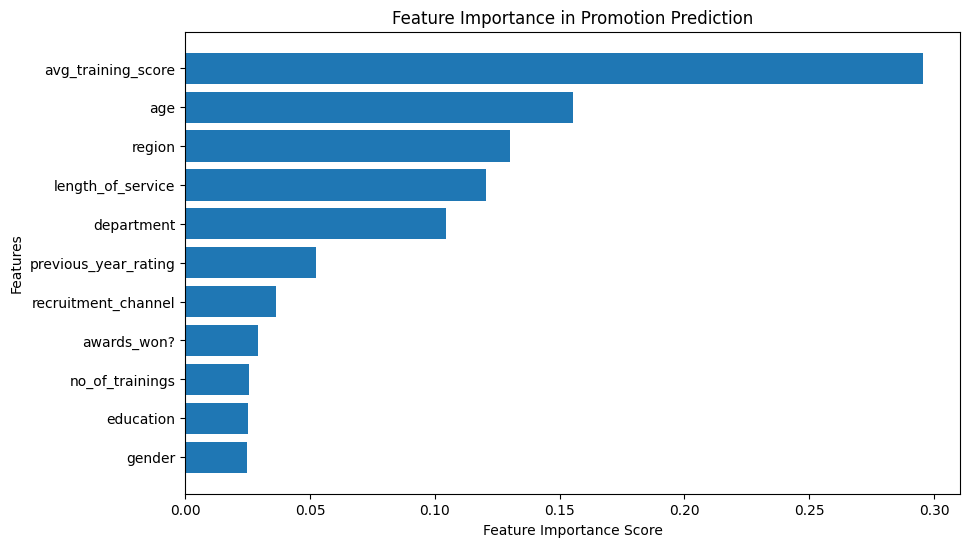

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance scores
feature_importances = best_model.feature_importances_
features = X_train.columns  # Get feature names

# Sort feature importance
sorted_idx = np.argsort(feature_importances)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Promotion Prediction")
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import pandas as pd

# Handle missing values by imputing with mean
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)  # Impute missing values

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("New class distribution after SMOTE:\n", pd.Series(y_train_balanced).value_counts())

Original class distribution:
 is_promoted
0    40112
1     3734
Name: count, dtype: int64
New class distribution after SMOTE:
 is_promoted
0    40112
1    40112
Name: count, dtype: int64


In [20]:
# Train the model again with balanced data
model.fit(X_train_balanced, y_train_balanced)

# Predict again
train_predictions = model.predict(X_train_balanced)

# Check accuracy after balancing
from sklearn.metrics import accuracy_score
print("Training Accuracy After SMOTE:", accuracy_score(y_train_balanced, train_predictions))

Training Accuracy After SMOTE: 0.9997506980454727


In [21]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (5 folds)
cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced, cv=5, scoring="accuracy")

# Print average accuracy
print("Cross-Validation Accuracy:", cv_scores.mean())

Cross-Validation Accuracy: 0.9569958494476742


In [22]:
# Make final predictions on test data
final_predictions = model.predict(test_df.drop("employee_id", axis=1))

# Create the final submission file
submission = test_df.copy()
submission["is_promoted"] = final_predictions

# Save final predictions
submission.to_csv("final_employee_promotion_predictions.csv", index=False)

# Download the final CSV
from google.colab import files
files.download("final_employee_promotion_predictions.csv")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
# prompt: now save and download  the model using that model i can connec to flask

import pickle
from google.colab import files

# Assuming 'best_model' is your trained model
# Save the model to a file
filename = 'employee_promotion_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

# Download the saved model file
files.download(filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
import joblib

# Save label encoders after training
joblib.dump(label_encoders, "label_encoders.pkl")

print("✅ Label encoders saved as 'label_encoders.pkl'")


✅ Label encoders saved as 'label_encoders.pkl'


In [25]:
import os

# Check if 'label_encoders.pkl' exists
if not os.path.exists("label_encoders.pkl"):
    print("❌ Error: 'label_encoders.pkl' not found. Please run the training script first.")
    exit()

# Load label encoders
label_encoders = joblib.load("label_encoders.pkl")
print("✅ Label encoders loaded successfully.")


✅ Label encoders loaded successfully.


In [26]:
def get_int_input(prompt):
    """Helper function to get a valid integer input."""
    while True:
        value = input(prompt).strip()
        if value.isdigit():  # Check if input is a number
            return int(value)
        print("❌ Invalid input! Please enter a valid number.")

def get_user_input():
    print("\nEnter Employee Details for Promotion Prediction:")

    department = input("Department (Sales & Marketing, Operations, Technology, Analytics, Finance, HR, Legal): ").strip()
    education = input("Education (Bachelor's, Master's & above, Below Secondary): ").strip()
    gender = input("Gender (m/f): ").strip()
    recruitment_channel = input("Recruitment Channel (sourcing, other, referred): ").strip()
    region = input("Region (Enter same format as dataset, e.g., region_7): ").strip()

    # Get validated integer inputs
    no_of_trainings = get_int_input("Number of Trainings: ")
    age = get_int_input("Age: ")
    previous_year_rating = get_int_input("Previous Year Rating (1-5): ")
    length_of_service = get_int_input("Length of Service (Years): ")
    awards_won = get_int_input("Awards Won (1 = Yes, 0 = No): ")
    avg_training_score = get_int_input("Average Training Score (0-100): ")

    # Process and predict...
